# Table of Contents
* [Introduction](#Introduction)
	* [Guiding questions](#Guiding-questions)
	* [Related notebooks](#Related-notebooks)
* [Setup](#Setup)
	* [Imports](#Imports)
	* [Load data](#Load-data)
	* [code](#code)
	* [load](#load)
* [Analysis](#Analysis)
	* [code](#code)
	* [run](#run)
* [Conclusions](#Conclusions)
	* [Key findings](#Key-findings)
	* [Next steps](#Next-steps)


# Introduction

In [1]:
#interactive tableparser dev

# Setup

## Imports

In [2]:
%%capture
# from __future__ import division
import numpy as np
import pandas as pd
# import scipy.stats as st
# import itertools
# import math
# import hashlib
# from collections import Counter, defaultdict
# %autoreload

import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

import os
import cv2
import glob
import PIL.Image as Image
# import skimage.filters

# from urllib.request import url2pathname

In [3]:
%load_ext version_information
%reload_ext version_information
%version_information numpy, matplotlib, pandas, scipy, cv2, skimage, PIL

Software,Version
Python,3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython,6.0.0
OS,Darwin 16.6.0 x86_64 i386 64bit
numpy,1.12.1
matplotlib,2.0.2
pandas,0.20.1
scipy,0.19.0
cv2,3.2.0
skimage,0.13.0
PIL,4.1.1


In [4]:
hard_image = '/Users/schwenk/wrk/tableparse/data/tricky_tables/unnamed-3.png'
another_image = '/Users/schwenk/wrk/tableparse/data/tricky_tables/unnamed-2.png'
easy_image = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/sight-word-bingo.png'

output_dir = 'test_cc_output'
test_images = glob.glob('/Users/schwenk/wrk/tableparse/data/test_data/images/*')

In [5]:
image_to_do = test_images[100]

# Analysis

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
# ai2.vision.tableparse.img_utils.ifp(image_to_do)

In [8]:
import ai2.vision.tableparse
# import ai2.vision.tableparse.img_utils

In [17]:
# image_to_do = '/Users/schwenk/wrk/tableparse/data/test_data/images/table_103.png'
# image_to_do = '/Users/schwenk/wrk/tableparse/data/test_data/images/table_101.png'
image_to_do = '/Users/schwenk/wrk/tableparse/data/test_data/images/table_111.png'

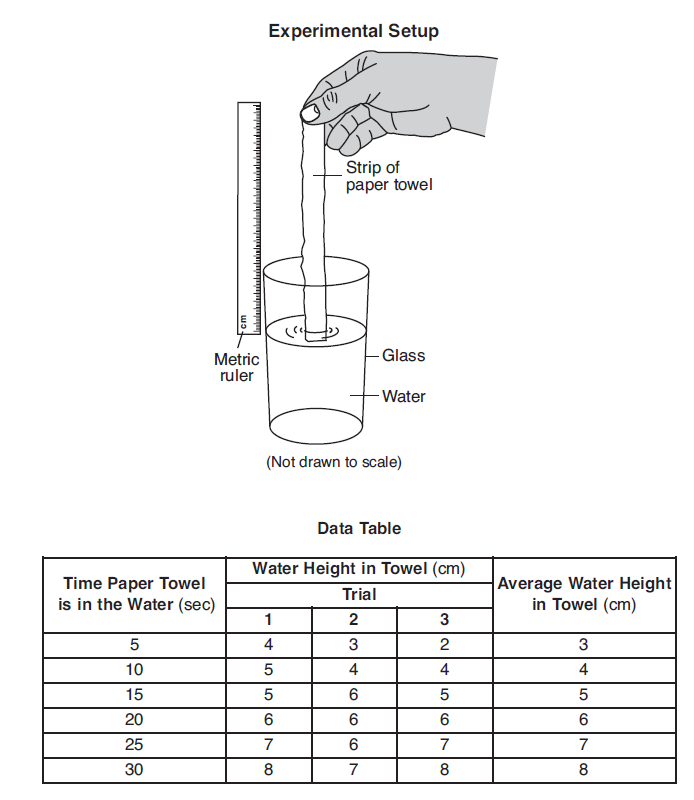

In [50]:
Image.open(image_to_do)

In [51]:
import ai2.vision.tableparse.img_utils as imgt

In [56]:
parsed_table = ai2.vision.tableparse.detect(image_to_do)

In [57]:
parsed_table.outside_text

[Experimental Setup [269,24,440,42],
 Strip of [346,158,400,178],
 paper towel [346,178,433,195],
 51 [241,312,265,330],
 (c [294,325,303,334],
 Metric [215,352,260,367],
 Glass [383,348,425,362],
 ruler [220,368,255,385],
 Water [382,390,425,403],
 (Not drawn to scale) [266,455,402,472],
 Data Table [318,521,401,536]]

In [59]:
test_ocr_cell = parsed_table.cell_array[0]

In [60]:
parsed_table.nearest_grid_cell(test_ocr_cell)

AttributeError: 'numpy.ndarray' object has no attribute 'center'

In [787]:
from ai2.vision.tableparse.cell import GridCell
from ai2.vision.tableparse.table import Table

test_table = Table(parsed_table.cells)

In [897]:
test_table.cell_array.shape

(8, 3)

In [789]:
test_cell_sort = parsed_table.v_sort()[:15]

compare gt table shapes

In [816]:
with open('../data/test_data/table_ground_truth.json', 'r') as f:
    gt_ds = json.load(f)

In [41]:
dist = np.linalg.norm(np.array([5, 2]) - ([3, 5]))

In [42]:
dist

3.6055512754639891

In [920]:
img_path_base = '/Users/schwenk/wrk/tableparse/data/test_data/images/'
parsed_tables = {}
for gtk in sorted(gt_ds.keys())[100:120]:
    gt_anno = gt_ds[gtk]
    print(gt_anno['imageName'])
    image = os.path.join(img_path_base, gt_anno['imageName'])
    parsed_tables[gtk] = ai2.vision.tableparse.detect(image)

table_101.png
table_102.png
table_103.png
table_104.png
table_105.png
table_106.png
table_107.png
table_108.png
table_109.png
table_110.png
table_111.png
table_112.png
table_113.png
table_114.png
table_115.png
table_116.png
table_117.png
table_118.png
table_119.png
table_120.png


In [923]:
for tk in parsed_tables:
    print(len(gt_ds[tk]['annotations']), np.product(parsed_tables[tk].cell_array.shape), gt_ds[tk]['imageName'])

24 24 table_101.png
12 12 table_102.png
28 28 table_103.png
10 10 table_104.png
12 12 table_105.png
8 8 table_106.png
24 24 table_107.png
15 15 table_108.png
8 8 table_109.png
32 35 table_110.png
37 45 table_111.png
12 12 table_112.png
30 32 table_113.png
25 25 table_114.png
26 26 table_115.png
12 12 table_116.png
8 8 table_117.png
39 39 table_118.png
10 10 table_119.png
10 10 table_120.png
